In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\HP\AppData\Local\Temp\ipykernel_104848\3114109353.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start="1993-01-01")
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open   Volume     12_ema  \
Date                                                                         
1993-01-29  24.241413  24.258655  24.137965  24.258655  1003200  24.241413   
1993-02-01  24.413816  24.413816  24.258644  24.258644   480500  24.334798   
1993-02-02  24.465546  24.482787  24.344856  24.396580   201300  24.385829   
1993-02-03  24.724169  24.741410  24.482789  24.500031   529400  24.492630   
1993-02-04  24.827620  24.879344  24.534516  24.810378   531500  24.583645   

Price          27_ema      MACD    Signal  MACD_hist  Strategy  Asset_Returns  \
Date                                                                            
1993-01-29  24.241413  0.000000  0.000000   0.000000       NaN            NaN   
1993-02-01  24.330807  0.003991  0.002217   0.001774      -1.0       0.007112   
1993-02-02  24.379087  0.006742  0.004072   0.002671       1.0       0.009246   
1993-02-03  24.475170  0.017459  0.008607   0.00

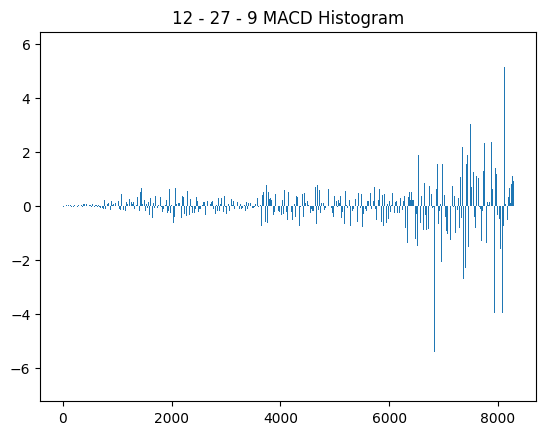

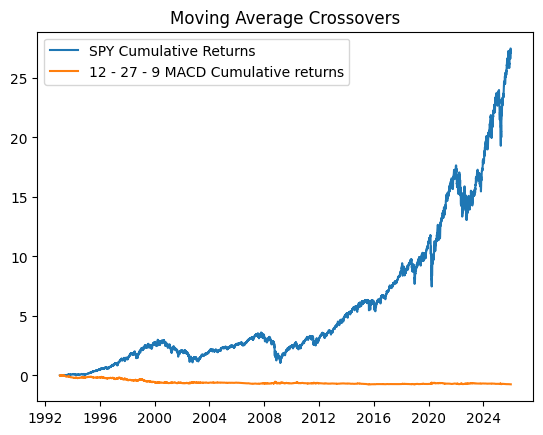

In [ ]:
TICKER = 'SPY'
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9
LOOKBACK = 10000

def get_data(TICKER):
    df = yf.download(TICKER, start="1993-01-01") 
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:, :]


def add_MACD(df, fast = MACD_FAST, slow = MACD_SLOW, span = MACD_SPAN):
    df[f'{fast}_ema'] = df['Close'].ewm(span = fast).mean()
    df[f'{slow}_ema'] = df['Close'].ewm(span = MACD_SLOW).mean()

    #MACD line is the difference between the fast and slow
    df[f'MACD'] = df[f'{fast}_ema'] - df[f'{slow}_ema']

    # macd signal is a 9-period moving avrage of this line
    df['Signal'] = df['MACD'].ewm(span = span).mean()

    #MACD histogram is almost always what is used in TA
    df['MACD_hist'] = df['MACD'] - df['Signal']

    plt.bar(x = range(len(df)), height = df['MACD_hist'])
    plt.title(f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Histogram')
    return df

def add_strategy(df):
    df['Strategy'] = 0
    df['Strategy'] = np.where(df['MACD_hist'] > 0, 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)

    return df

def test_strategy(df):
    df['Asset_Returns'] = (1+ df['Close']. pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1+ df['Close']. pct_change() * df['Strategy']).cumprod() - 1


    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{TICKER} Cumulative Returns', f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Cumulative returns'])
    plt.title('Moving Average Crossovers')

    return df

def main():
    df = get_data(TICKER)
    df = add_MACD(df, fast = MACD_FAST, slow = MACD_SLOW, span = MACD_SPAN)
    df = add_strategy(df)
    df = test_strategy(df)
    print(df.head())

    return df
df = main()






Text(0.5, 1.0, '12 - 27 - 9 Values')

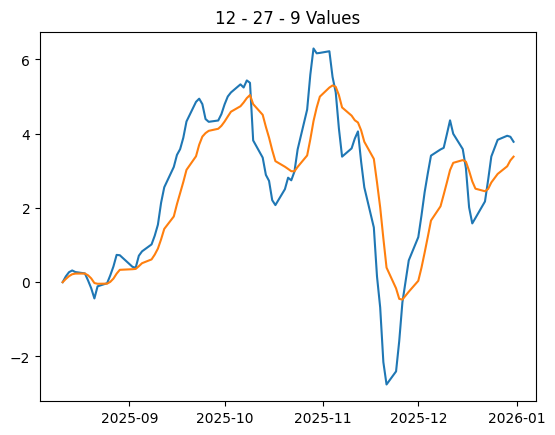